In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

import base
import fund_scanner.common_tools.database as db
sqlalchemy_engine = db.get_sqlalchemy_engine()

In [2]:
def read_funds_price(funds_id_list):
    ret = pd.DataFrame([])
    for funds_id in funds_id_list:
        df = pd.read_sql('select funds_price_date, funds_price_adjust from funds_historical_price where funds_id=%s order by funds_price_date'%funds_id, sqlalchemy_engine)
        df['funds_price_date'] = pd.to_datetime(df['funds_price_date'])
        df = df.set_index(keys='funds_price_date')
        today_s_price = df.iloc[-1,0]
        df['funds_price_adjust'] = df['funds_price_adjust'] / today_s_price
        df.columns = [str(funds_id)]
        ret = pd.concat([ret,df], axis=1)
    return ret
def read_benchmarks_price(benchmarks_id_list):
    ret = pd.DataFrame([])
    for benchmarks_id in benchmarks_id_list:
        df = pd.read_sql('select benchmarks_price_date, benchmarks_price_adjust from benchmarks_historical_price where benchmarks_id=%s order by benchmarks_price_date'%benchmarks_id, sqlalchemy_engine)
        df['benchmarks_price_date'] = pd.to_datetime(df['benchmarks_price_date'])
        df = df.set_index(keys='benchmarks_price_date')
        today_s_price = df.iloc[-1,0]
        df['benchmarks_price_adjust'] = df['benchmarks_price_adjust'] / today_s_price
        df.columns = [str(benchmarks_id)]
        ret = pd.concat([ret,df], axis=1)
    return ret

d = pd.read_sql('select a.funds_id from (select DISTINCT (funds_id) from funds_historical_price) a left join funds b on a.funds_id=b.funds_id where b.funds_code="540006" limit 0,1', sqlalchemy_engine)
df = read_funds_price(d['funds_id'].tolist())
df_b = read_benchmarks_price([1])



In [3]:
df = df[df.index > pd.to_datetime("2009-01-01")]
df_b = df_b[df_b.index > pd.to_datetime("2009-01-01")]
df_new = pd.DataFrame()
for column in df.columns:
    #column='97'
    c = df.loc[:,column]
    c1 = c[c>0].idxmin()
    c2 = df_b.index.get_loc(c1, method='nearest')
    custom_benchmark = df_b.iloc[c2,0] / df.loc[c1,column]
    c = c * custom_benchmark
    df_new = pd.concat([df_new,c], axis=1)

#df[df[column]>-1]


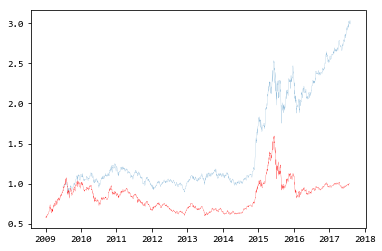

In [4]:
plt.figure()
line1 = plt.plot(df_new)
line2 = plt.plot(df_b)
plt.setp(line1, linestyle='-', alpha=0.6, linewidth=0.2)
plt.setp(line2, linestyle='-', color='r', linewidth=0.2)
plt.show()

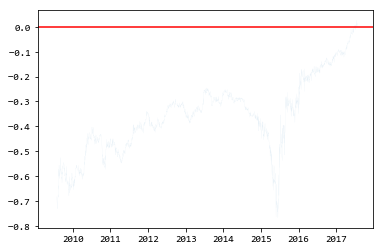

In [5]:
df_total = df.subtract(df_b.iloc[:,0], axis=0)
line1 = plt.plot(df_total)
plt.setp(line1, linestyle='-', alpha=0.1, linewidth=0.2)
plt.axhline(0, color='r')
plt.show()

In [6]:
df_aj = df - df_b.iloc[:,0]

df_aj

,2009-01-05 00:00:00,2009-01-06 00:00:00,2009-01-07 00:00:00,2009-01-08 00:00:00,2009-01-09 00:00:00,2009-01-12 00:00:00,2009-01-13 00:00:00,2009-01-14 00:00:00,2009-01-15 00:00:00,2009-01-16 00:00:00,...,2017-07-17 00:00:00,2017-07-18 00:00:00,2017-07-19 00:00:00,2017-07-20 00:00:00,2017-07-21 00:00:00,2017-07-24 00:00:00,2017-07-25 00:00:00,2017-07-26 00:00:00,2017-07-27 00:00:00,4269
funds_price_date,,,,,,,,,,,,,,,,,,,,,
2009-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = pd.read_sql('SELECT * FROM funds LEFT JOIN funds_update ON funds.funds_id=funds_update.funds_id', c)
df1 = df[(df['funds_type'] == '股票型')]
df2 = df[(df['funds_type'] == '股票指数')]

AttributeError: 'Series' object has no attribute 'cursor'

In [ ]:
df['funds_start_year'] = df['funds_start_date'].map(lambda x: x.year)
df.columns

In [ ]:

#(g.count().loc[:,'funds_type']).plot(kind='bar')


In [ ]:
df1 = df1.drop(['n'], axis=1)
df1['n'] = round(df1['funds_recent_3_month']*1)

df1.describe()


#round(df['funds_recent_1_month']).groupby(by='').count().plot()

In [ ]:
df['n'] = round(df['funds_recent_3_month']*1)

g = (df[(df['funds_type']=='混合型') | (df['funds_type']=='股票型')]).groupby(['n'])
g.count().iloc[:,0].plot(kind='bar')

In [ ]:
df['another_2_month'] = df['funds_recent_3_month']-df['funds_recent_1_month']
df['another_3_month'] = df['funds_recent_6_month']-df['funds_recent_3_month']

df1 = df[(df['another_2_month']>0) & (df['another_3_month']>0) & (df['funds_type']=='混合型') ]
df1['n'] = round(df1['funds_recent_1_month'])
g = df1.groupby('n')
g.count().iloc[:,0].plot(kind='bar')



In [ ]:
df2 = df[(df['another_2_month']<0) & (df['funds_type']=='混合型') ]
df2['n'] = round(df2['funds_recent_1_month'])
g = df2.groupby('n')
g.count().iloc[:,0].plot(kind='bar')

In [ ]:
g = df.groupby(by='funds_type')
#g.mean().iloc[:,6:].sort_values(by='funds_recent_3_month', ascending=False)
g.count().iloc[:,[0]]